In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Agenda



*   Linear kernel SVM on simple dataset
*   Polynomial kernel SVM on simple dataset
*   RBF kernel SVM on simple dataset
*   Tuning SVM


# Linear kernel SVM


**Using SVC (Support Vector Classifier) on sklearn to solve a simple linearly separable classification problem**

## Load data

Link to [GDrive of dataset](https://drive.google.com/file/d/1l_pk2lAt8kf5_XDFbDga5XxOTi_UvI3Q/view?usp=sharing)

In [ ]:
# Generate isotropic Gaussian blobs for clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.datasets.samples_generator import make_blobs # ko cần dùng numpy, generate 2D data để test cho nhanh
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1612)

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=1612, cluster_std=2) # centers/cluster_std=2: có 2 cái
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Number of datapoints in class 0: ', len(X[y == 0]))
print('Number of datapoints in class 1: ', len(X[y == 1]))

Shape of X: (50, 2)
Shape of y: (50,)
Number of datapoints in class 0:  25
Number of datapoints in class 1:  25


## Visualize data

Text(0.5, 1.0, 'Dataset')

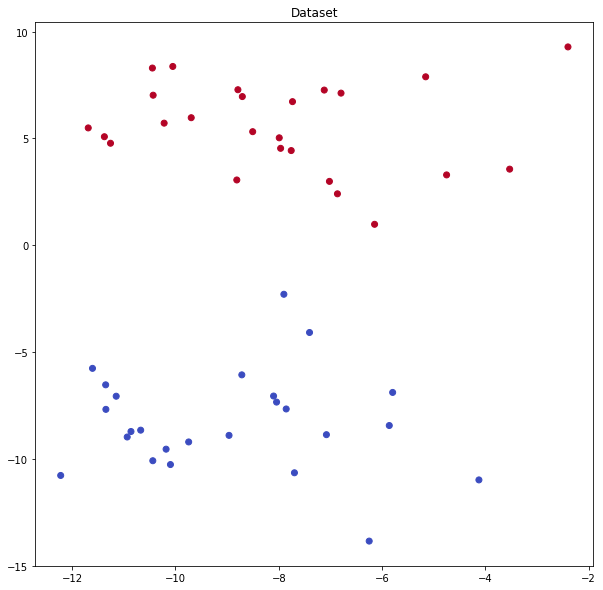

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm') # scatter 1 code line; c=y: separate colors # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title('Dataset')

In [ ]:
def plot_decision_boundary(X, y, model, name):
  # meshgrid: Return coordinate matrices from coordinate vectors # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.05)) 
  # predict Z from meshgrid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # numpy.ravel() == numpy.reshape(-1) # Returns contiguous flattened array(1D array with all the input-array elements and with the same type as it) # https://www.geeksforgeeks.org/numpy-ravel-python/
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(10, 10))
  plt.gca().contourf(xx, yy, Z, cmap='coolwarm', alpha=0.7) # plot decision boundary
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
  # plt.scatter(model.support_vectors_[:, 0],
  #               model.support_vectors_[:, 1],
  #               s=100, lw=1, facecolors='purple'); # plot support vectors
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.title(name)
  plt.show()

## Apply SVM using sklearn

SVC's parameters from sklearn [Read more](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

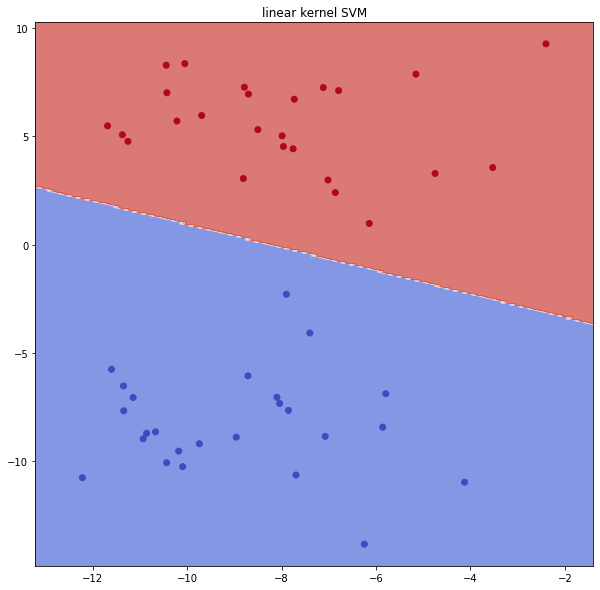

In [ ]:
# C-Support Vector Classification
from sklearn.svm import SVC # "C-Support Vector Classifier" # SVM dùng cho việc phân loại
# C is a regularization parameter
model = SVC(kernel='linear', C=1) # slides about Kernel
model.fit(X, y)
# plot decision boundary
plot_decision_boundary(X, y, model, name='linear kernel SVM')

# Polynomial Kernel SVM

**Using SVR (Support Vector Regressor) with Polynomial kernel to solve a regression problem**

## Load data

In [ ]:
# Random from the “standard normal” distribution
x = np.random.randn(2000, 1)
# Random noise
noise = np.random.randn(2000, 1)
y = 5 * (x**3) + 3 * (x**2) + 10 * noise + 2

## Visualize data

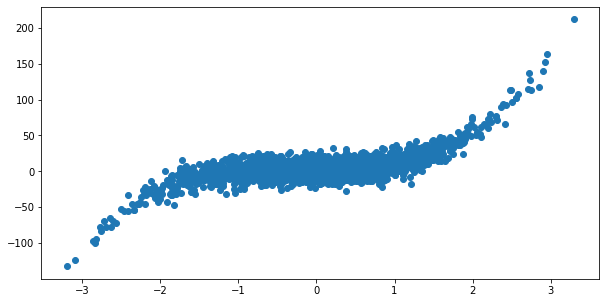

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.show()

**Noted**

*   x's range = [-4, 4] 
*   y's range = [-200, 200] 


## Feature Scaling


Use Standard Scaler to scale both X and y

In [ ]:
# 1. import StandardScaler from sklearn
# 2. Apply scaling on y

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Method 1: # apply Scaler on y & name that scaled y by y
y = scaler.fit_transform(y) # Train model thì fit_transform Train Set only (not Test Set)

# Method 2:
# scaler.fit(y)
# y_trans = scaler.transform(y) # # = y

Visualize scaled data

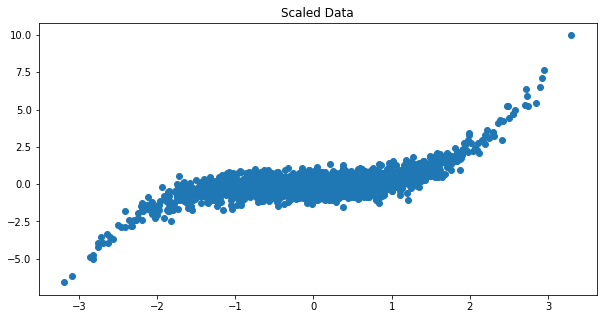

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.title('Scaled Data')
plt.show()

## Apply SVR with Polynomial kernel

SVR's parameters from sklearn [Read more](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [ ]:
# 1. import SVR from sklearn
# 2. create SVR variable with kernel='poly', C=10 (create model)
# 3. fit with x, y

# Epsilon-Support Vector Regression
from sklearn.svm import SVR 
model = SVR(kernel='poly', C=10)
model.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

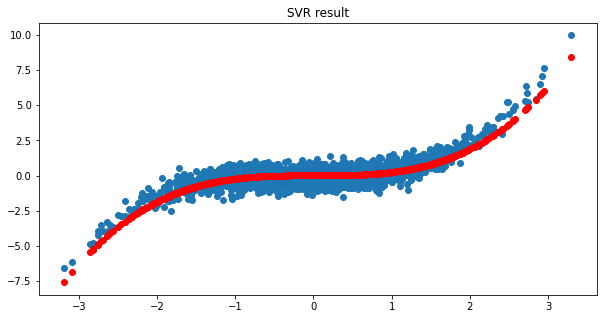

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.scatter(x, model.predict(x), c='red')
plt.title('SVR result')
plt.show()

# RBF Kernel SVM

**Using SVC with RBF kernel to solve non-linearly separable problem**





## Load data

In [ ]:
# https://docs.python.org/3/library/pickle.html
import pickle 

DATA_PATH = '/content/drive/My Drive/Colab Notebooks/rbf_data.pickle'

with open(DATA_PATH, 'rb') as file:
  data = pickle.load(file)

print('Shape of data:', data.shape)

Shape of data: (400, 3)


Get X, y from data

In [ ]:
# 1. Get X from the first 2 columns 
# 2. Get y from the last column
# 3. Print out shape of X, y
# 4. Print out number of points belong to class 0 and 1
X = data[:, [0,1]] # do trong này ko slice đc
y = data[:, -1]
print('X shape:', X.shape)
print('y shape:', y.shape)
print('Number of datapoints in class 0: ', len(X[y == 0]))
print('Number of datapoints in class 1: ', len(X[y == 1]))

X shape: (400, 2)
y shape: (400,)
Number of datapoints in class 0:  188
Number of datapoints in class 1:  212


Split data into Train Set and Test Set

In [ ]:
# 1. Split X,y into Train Set and Test Set
# 2. Print out the shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1612) # do data ít qúa nên để 0.4
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X test', X_test.shape)
print('Shape of y test', y_test.shape)

Shape of X train (240, 2)
Shape of y train (240,)
Shape of X test (160, 2)
Shape of y test (160,)


## Visualize data

Text(0.5, 1.0, 'Test Set')

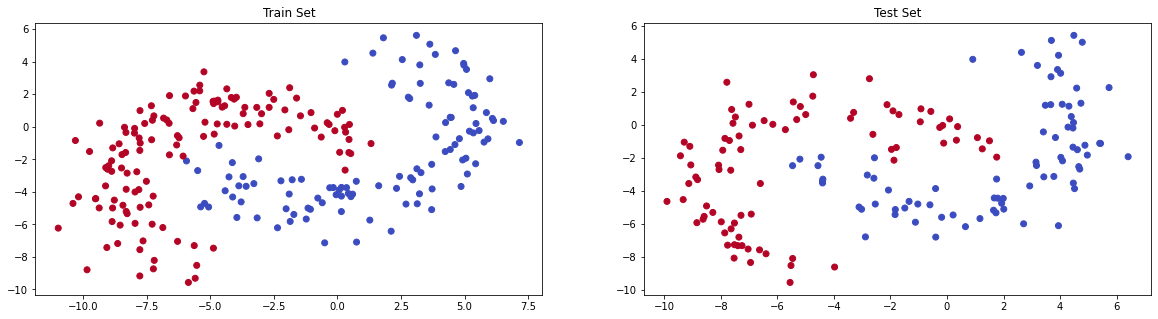

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')
plt.title('Train Set')

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm')
plt.title('Test Set')

(240, 2)
(160, 2)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 128)               384       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               16512     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               16512     
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 2ms/step - loss: 5.0309e-05 - accuracy: 1.0000
[5.030865

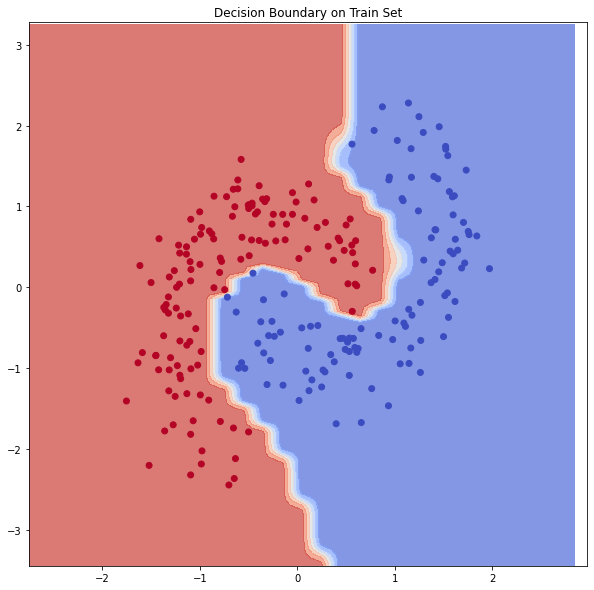

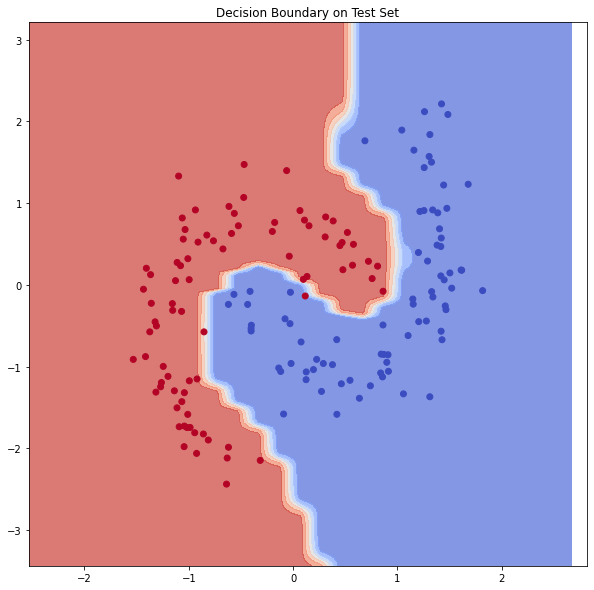

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Scale function
scaler = StandardScaler()
loss = [] # array to store model loss history
acc = [] # array to store model accuracy history
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.shape)
model = Sequential()

# print(X.shape[1:])
model.add(Dense(128, activation='relu', name='hidden_layer_1', input_shape=X.shape[1:]))
model.add(Dense(128, activation='relu', name='hidden_layer_2', input_shape=X.shape[1:]))
model.add(Dense(128, activation='relu', name='hidden_layer_3', input_shape=X.shape[1:]))
model.add(Dense(128, activation='relu', name='hidden_layer_4', input_shape=X.shape[1:]))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

def train_model(model, epochs):
  history = model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
  print(model.evaluate(X_train_scaled,y_train))  
  loss.extend(history.history['loss'])
  acc.extend(history.history['accuracy'])

train_model(model, epochs=200)

plot_decision_boundary(X_train_scaled, y_train, model, name = 'Decision Boundary on Train Set')
plot_decision_boundary(X_test_scaled, y_test, model, name = 'Decision Boundary on Test Set')

## Apply SVM with RBF kernel

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
# C is a regularization parameter 
C = 0.3 # 0.1 
# gamma is a parameter
gamma = 0.3 # 0.1

# 1. create SVC variable with kernel='rbf', C=C, gamma=gamma
# 2. fit model on X_train, y_train
model = SVC(kernel='rbf', C=C, gamma=gamma)
model.fit(X_train, y_train)

# Model map đc 1 line theo các scatter dots của data thì model đó chuẩn (generalize đc data)
# Ko đi qua đc gọi là underfitting (chưa tới)
# Học nhiều quá rồi đi theo kiểu snake (overfitting)

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Model accuracy
print('Accuracy score on Train Set:', str(model.score(X_train, y_train)))
print('Accuracy score on Test Set:', str(model.score(X_test, y_test)))

Accuracy score on Train Set: 0.9875
Accuracy score on Test Set: 0.99375


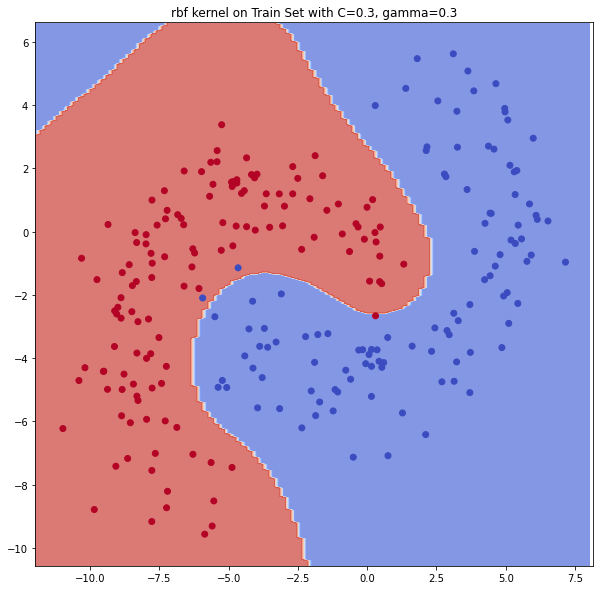

In [ ]:
# plot decision boundary Train Set
plot_decision_boundary(X_train, y_train, model,
                       name='rbf kernel on Train Set with C={}, gamma={}'.format(str(C), str(gamma)))

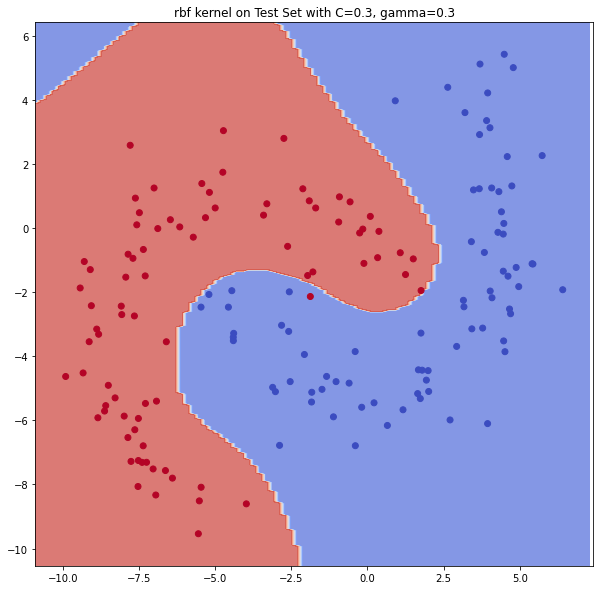

In [ ]:
# plot decision boundary Test Set
plot_decision_boundary(X_test, y_test, model,
                       name='rbf kernel on Test Set with C={}, gamma={}'.format(str(C), str(gamma)))

# Tuning SVM (điều chỉnh SVM)

K-fold Cross Validation: mỗi vòng lặp là thay đổi vị trí set

--> Dành cho ML

--> Deep Learning thì không dùng K-fold Cross Validation

![K-fold Cross Validation](https://i.imgur.com/rJptDqq.png)

Define GridSearch for C and gamma

(Define sẵn 1 cái array mình muốn search) : thay đổi C, gamma (từ 0 đến 100)

MLP (Neural Network): thay đổi hidden units (theo số mũ của 2)

In [ ]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100] # nhân 3 cho dễ hiểu
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100] # nhân 3 cho dễ hiểu
# Chia sao thì tuỳ mình --> Tự động trả ra cặp ideal để accu cao nhất

In [ ]:
# Exhaustive search over specified parameter values for an estimator.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
param_grid = {'C': C_values,
              'gamma': gamma_values} # tạo dict với key names giống tên param mình cần
model = SVC()
grid = GridSearchCV(model, param_grid, cv=5) # cv=5: số K-fold chia 5 phần. 4 phần Train, 1 phần Test rồi thay đổi vị trí

grid.fit(X_train, y_train) # Train model on Train Set only (not on Test Set)
print(grid.best_params_)

# Validation:
# Hết 1 epoch: tính accu(validation)
# ...
# Lấy model vào test set để ra accu(test)
# Đẹp thì giữ
# Xấu thì đập làm lại

{'C': 0.3, 'gamma': 0.1}


Get the best model from grid

In [ ]:
# Get the Accuracy Scores on Train Set and Test Set
model = grid.best_estimator_
print('Accuracy score on Train Set:', str(model.score(X_train, y_train)))
print('Accuracy score on Test Set:', str(model.score(X_test, y_test)))

Accuracy score on Train Set: 0.9875
Accuracy score on Test Set: 0.98125


In [ ]:
# Create Confusion Matrix ---> Compute confusion matrix to evaluate the accuracy of a classification
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred)) # test (true) 1st, pred 2nd !!!

[[78  1]
 [ 2 79]]


In [ ]:
# 78 True Positive
# 1 False Positve
# 2 False Negative 
# 79 True Negative

# Multiclass vs Class-Imbalanced ko đụng tới accuracy